In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_excel('bank.xlsx', sheet_name = "Data")

In [49]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID: Идентификатор клиента;

Age: Возраст клиента;

Experience: Опыт работы

Income: Доход клиента

ZIP Code: Почтовый индекс

Family: Состав семьи

CCAvg: Средние месячные расходы по кредитной карте

Education: Уровень образования (например, 1 - бакалавр, 2 - магистр, 3 - профессиональное)

Mortgage: Сумма ипотеки

Personal Loan: Принял ли клиент предложение о личном кредите

Securities Account: Наличие счета с ценными бумагами

CD Account: Наличие депозитного счета

Online: Использует ли клиент онлайн-банк

CreditCard: Наличие кредитной карты

In [17]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [19]:
df.duplicated().sum()  

0

In [62]:
df['Experience'] = df['Experience'].apply(lambda x: df[df['Experience'] >= 0]['Experience'].mean() if x < 0 else x)

In [66]:
neg_ex = df[df['Experience'] < 0].count()
neg_ex

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>,
        <Axes: title={'center': 'CD Account'}>],
       [<Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >]],
      dtype=object)

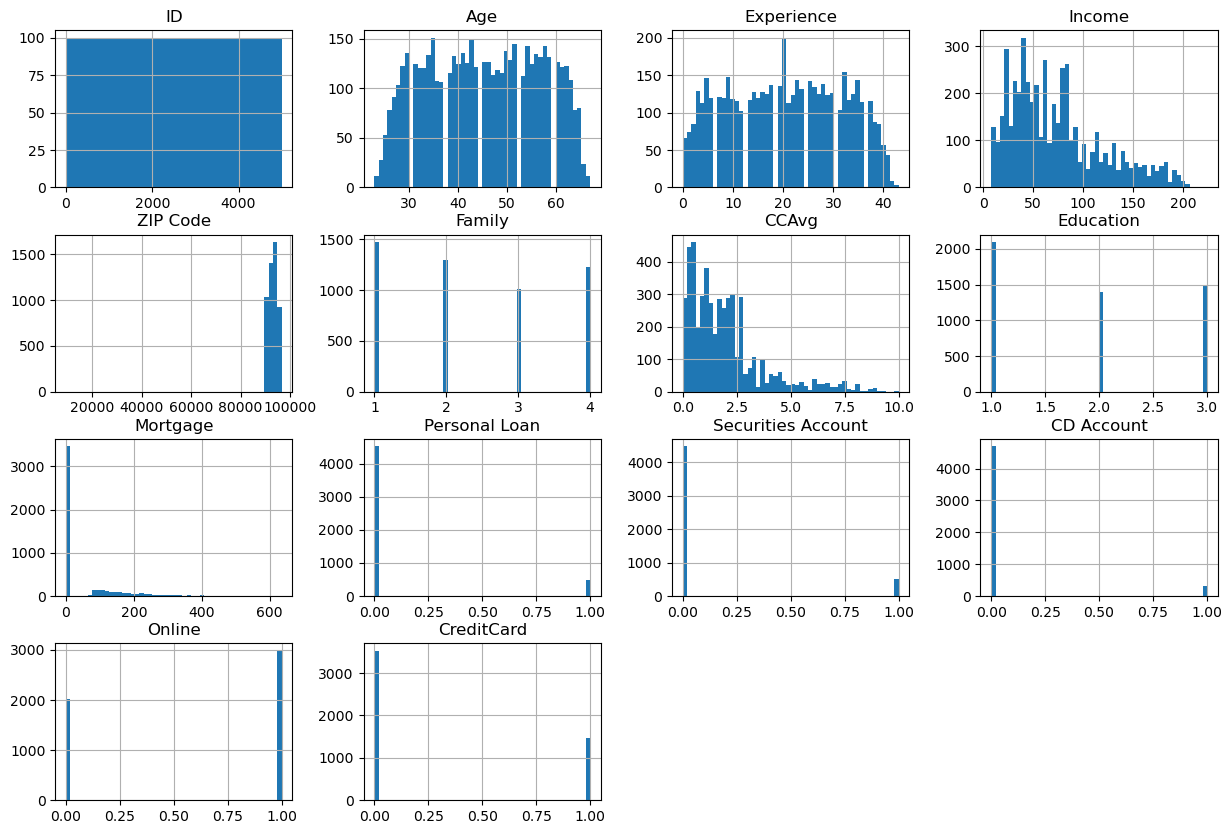

In [71]:
df.hist(figsize = (15,10), bins = 50)

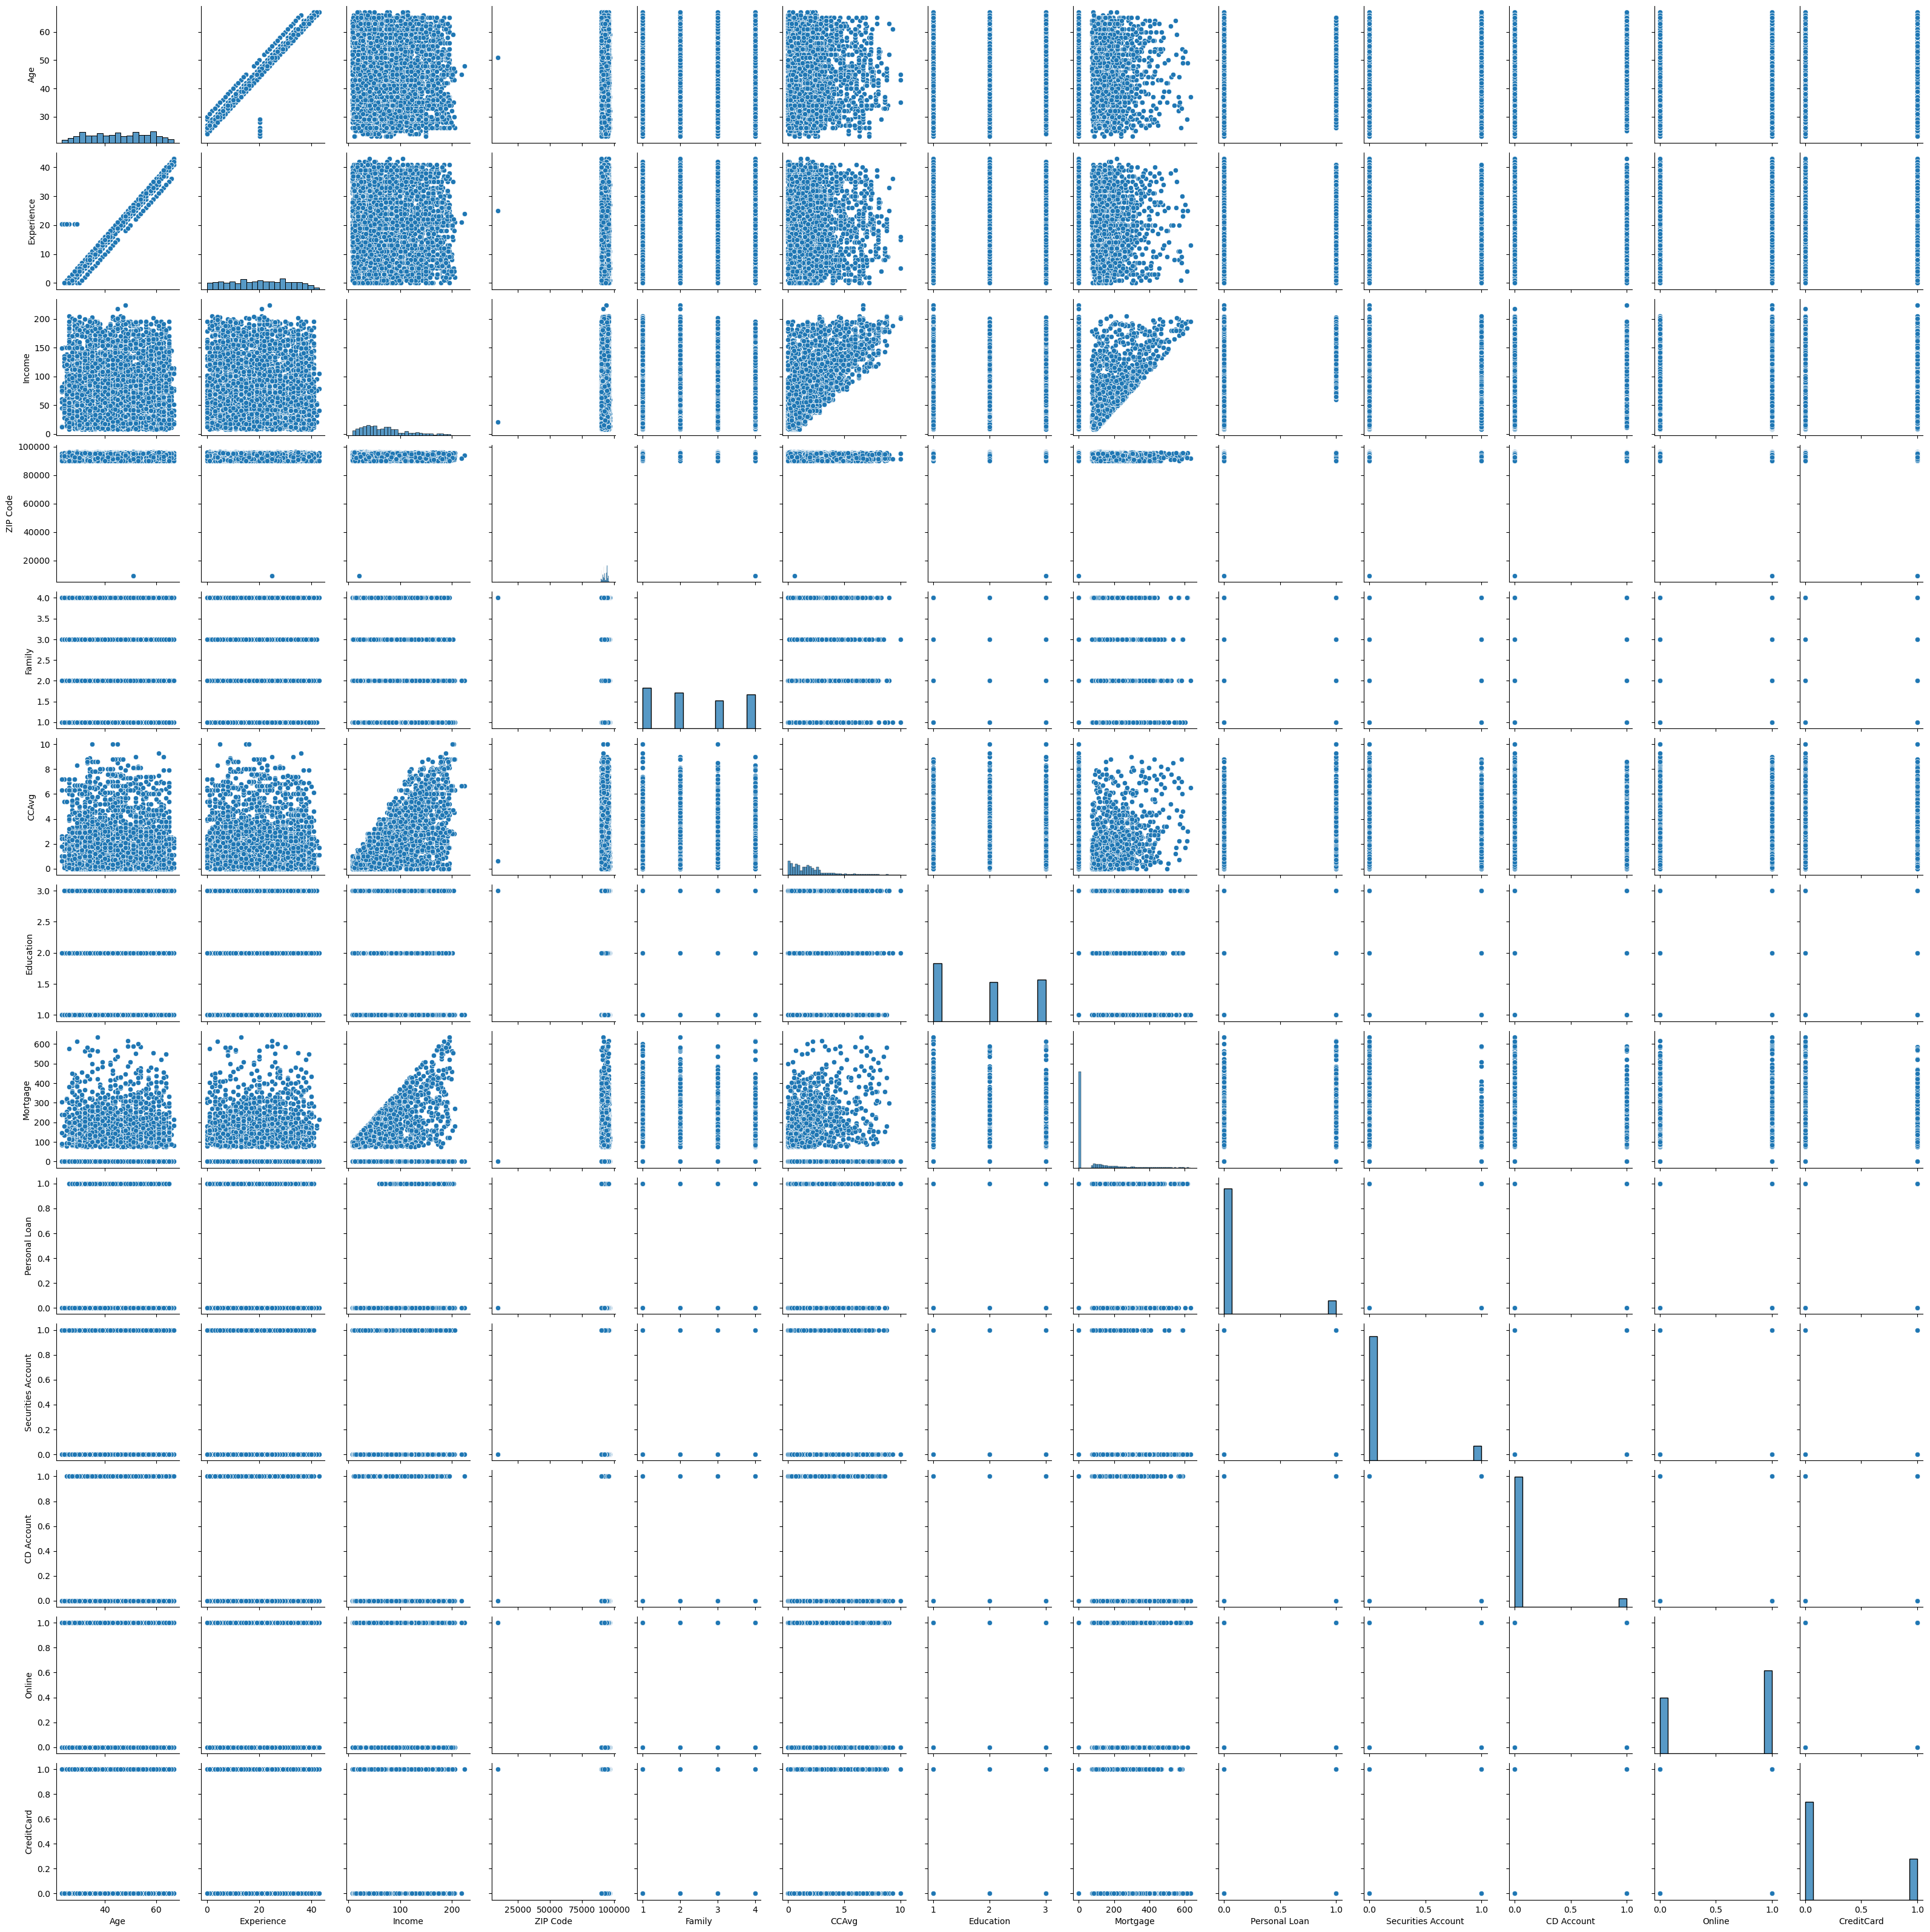

In [76]:
sns.pairplot(df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']])

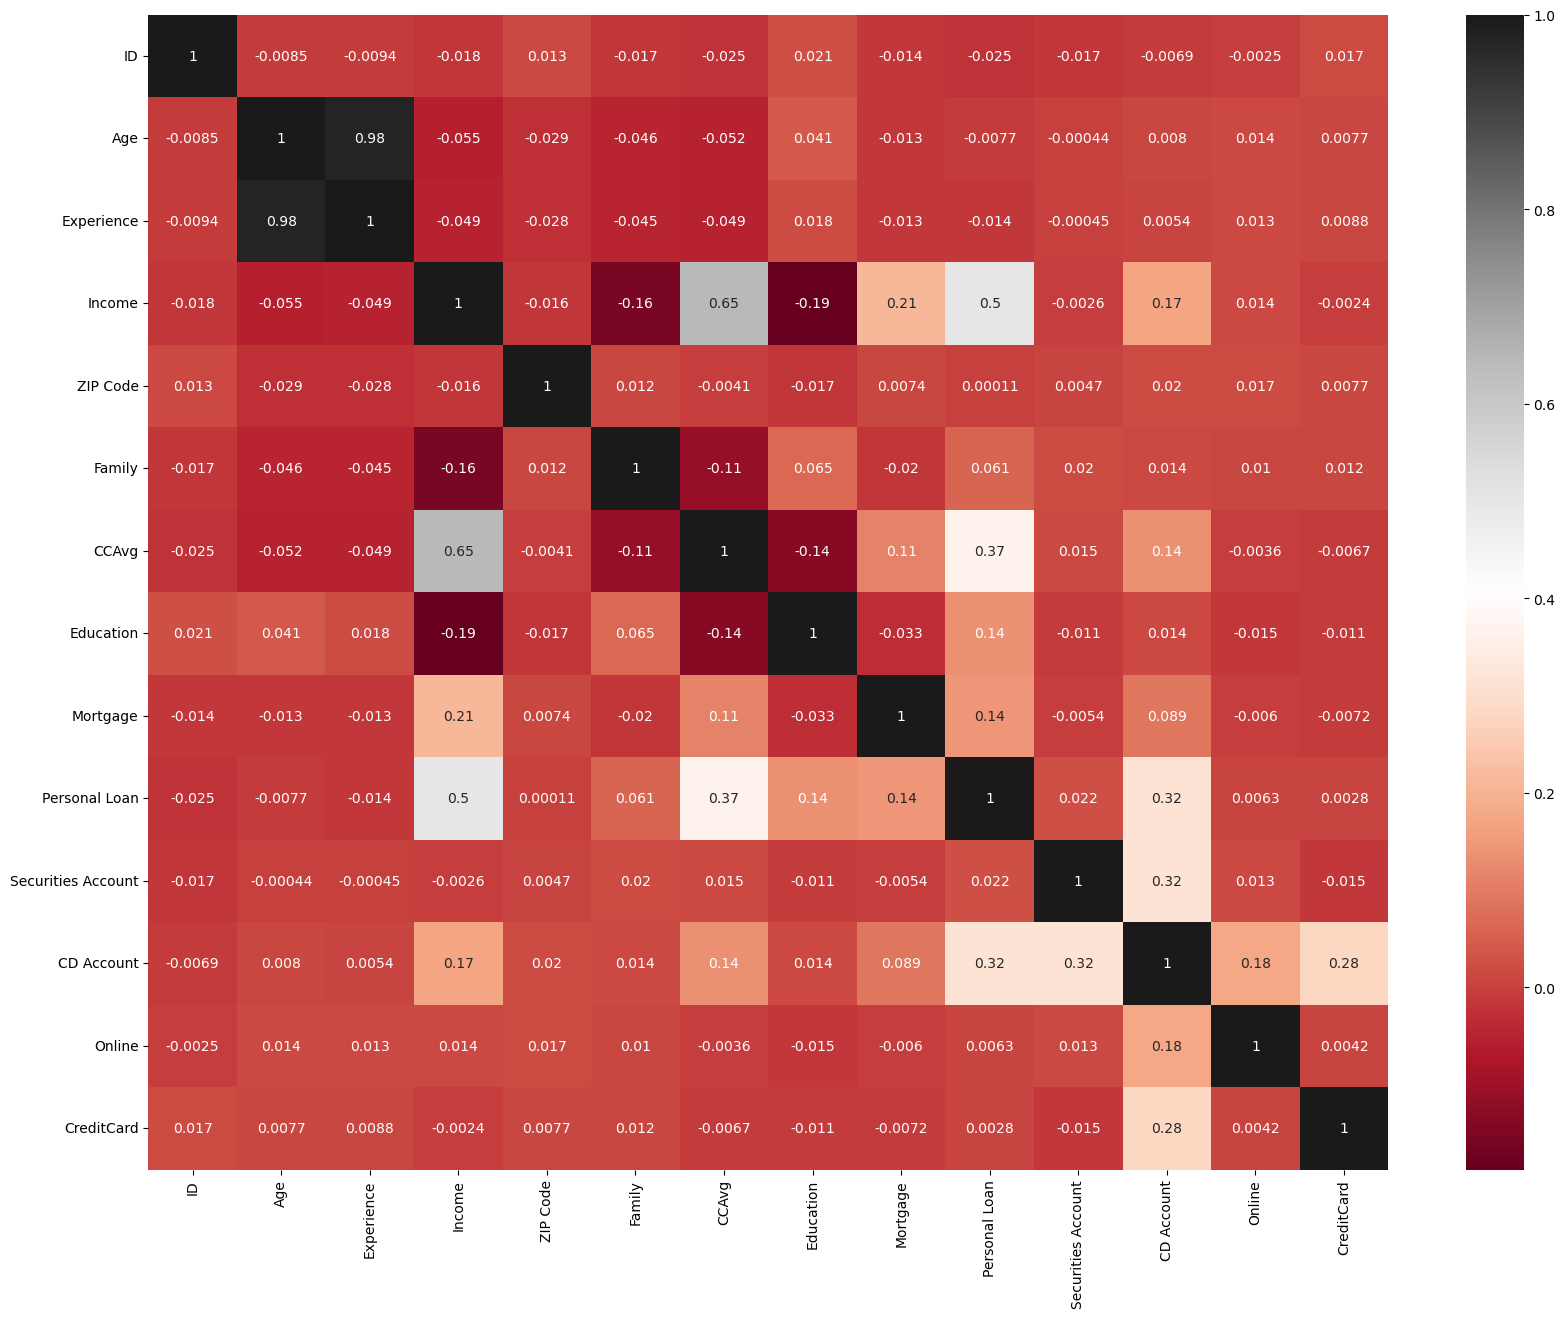

In [73]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

features_names = ['Age', 'Family', 'Education', 'Experience', 'CreditCard', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Income']

X = df[features_names]

y = df['Personal Loan']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Family', 'Education', 'Experience', 'CreditCard', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Income']], 
                                                      df['Personal Loan'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8953333333333333

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1348
           1       0.48      0.39      0.43       152

    accuracy                           0.90      1500
   macro avg       0.71      0.67      0.69      1500
weighted avg       0.89      0.90      0.89      1500



In [112]:
knn_accuracy = accuracy_score(y_test, y_pred, normalize=True)

In [68]:
from sklearn.metrics import confusion_matrix

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)

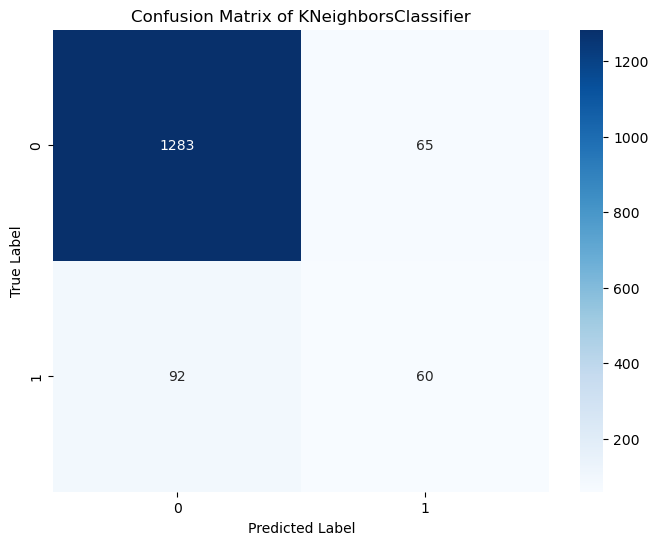

In [72]:
Y = df['Personal Loan']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNeighborsClassifier')
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB

In [80]:
%%time

gnb = GaussianNB()
gnb.fit(X_test, y_test)

CPU times: total: 0 ns
Wall time: 6.99 ms


GaussianNB()

In [82]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.882

In [86]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

In [88]:
conf_matrix = confusion_matrix(y_test, gnb_pred_test)

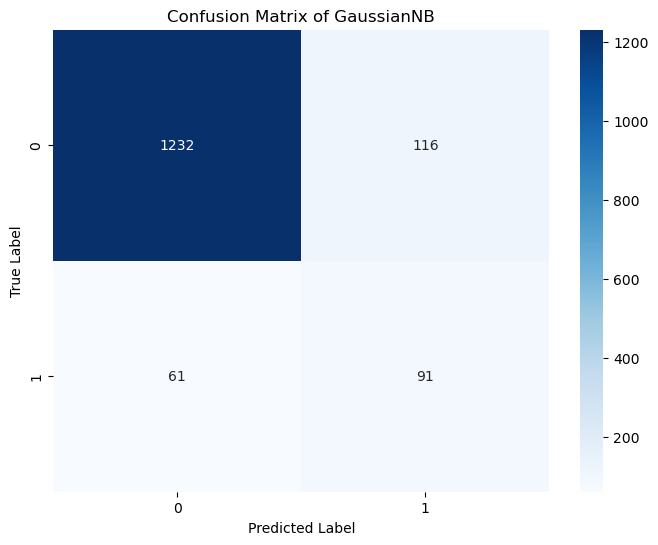

In [90]:
Y = df['Personal Loan']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of GaussianNB')
plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 88.4 ms


LogisticRegression(random_state=42)

In [98]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.9446666666666667

In [116]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

In [102]:
conf_matrix = confusion_matrix(y_test, lr_pred_test)

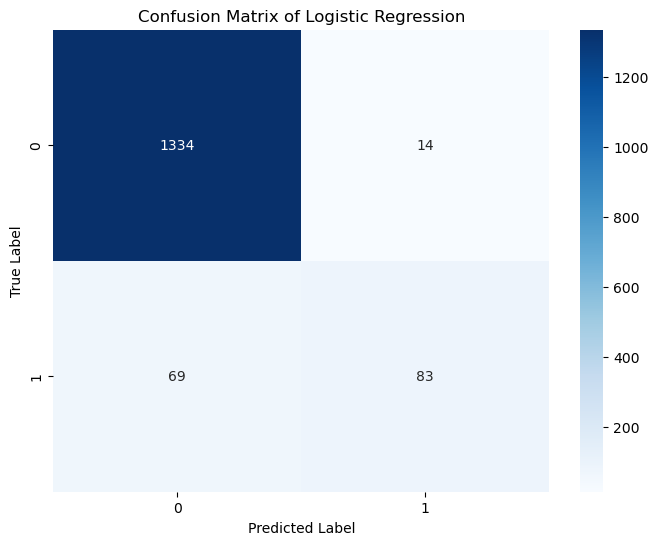

In [104]:
Y = df['Personal Loan']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [106]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [118]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, lr_accuracy]


In [120]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.895333
1,Gaussian Naive Bayes,0.882000
2,Logistic Regression,0.944667


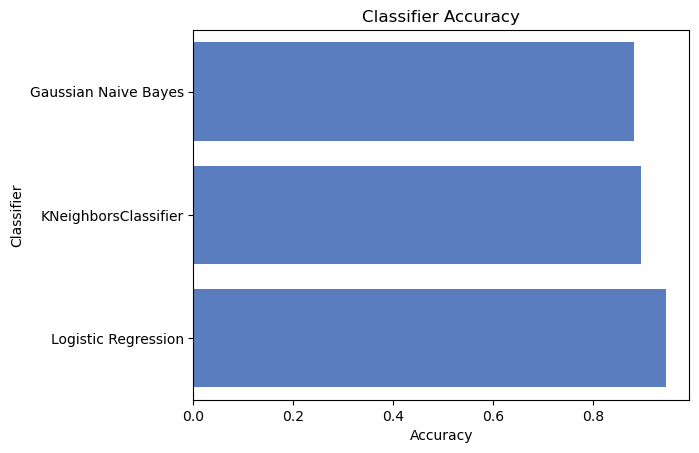

In [122]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [132]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_pred_test)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

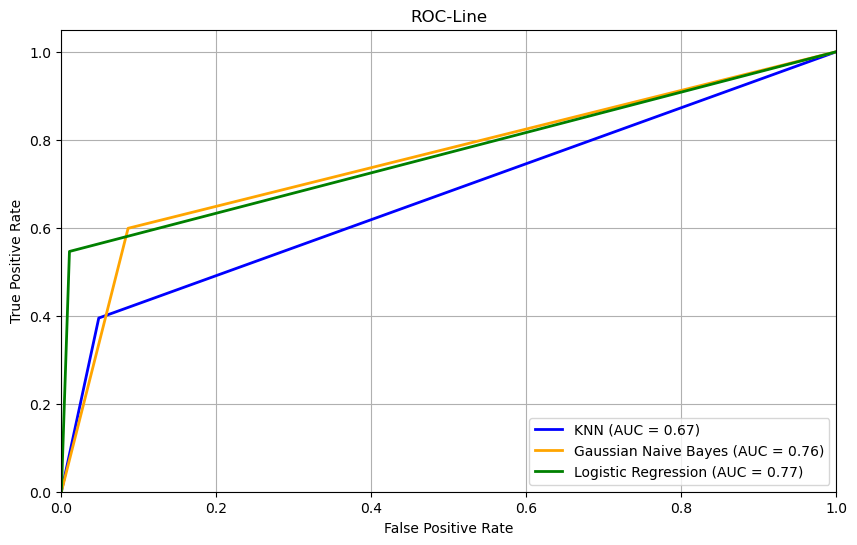

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_gnb, tpr_gnb, color='orange', lw=2, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Line')
plt.legend(loc='lower right')
plt.grid()
plt.show()